**1. Mild Alzheimer's (Early Stage)
Description: Symptoms are mild and may be mistaken for normal aging.

Symptoms:

Memory lapses, especially for recent events (e.g., forgetting appointments or misplacing items).
Difficulty finding the right words or recalling names.
Trouble with complex tasks (e.g., managing finances or planning a meal).
Increased anxiety, depression, or irritability.
Getting lost in familiar places.
Impact:

Individuals can still function independently with minor support.
Symptoms are noticeable to close family or friends but may not significantly disrupt daily life.
2. Moderate Alzheimer's (Middle Stage)
Description: The longest stage of the disease, where symptoms worsen and individuals require more support.

Symptoms:

Increased memory loss and confusion (e.g., forgetting family members or personal history).
Difficulty with activities of daily living (ADLs) like dressing, bathing, or preparing meals.
Poor judgment or decision-making.
Changes in behavior (e.g., wandering, aggression, paranoia, or hallucinations).
Difficulty with language, reading, and writing.
Sleep disturbances or changes in circadian rhythms.
Impact:

Significant interference with daily life; individuals need regular assistance.
Caregiver support becomes crucial as the person may struggle with safety and hygiene.
3. Severe Alzheimer's (Late Stage)
Description: The final stage, where individuals lose the ability to respond to their environment and communicate effectively.

Symptoms:

Severe memory loss and cognitive decline.
Loss of recognition of loved ones.
Difficulty swallowing or eating.
Limited mobility; may become bedridden.
Loss of bladder and bowel control.
Increasing vulnerability to infections (e.g., pneumonia).
Impact:

Requires 24/7 care for all aspects of life, including feeding, hygiene, and mobility.
Focus shifts to comfort and quality of life.
**

In [3]:
import pandas as pd

# Load your dataset
df_alz = pd.read_csv("alzheimers_disease_data.csv")

# Drop the 'DoctorIncharge' column
df_alz = df_alz.drop(["DoctorInCharge", "PatientID"], axis=1)  # Pass column names as a list

# Verify the column has been removed
df_alz.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

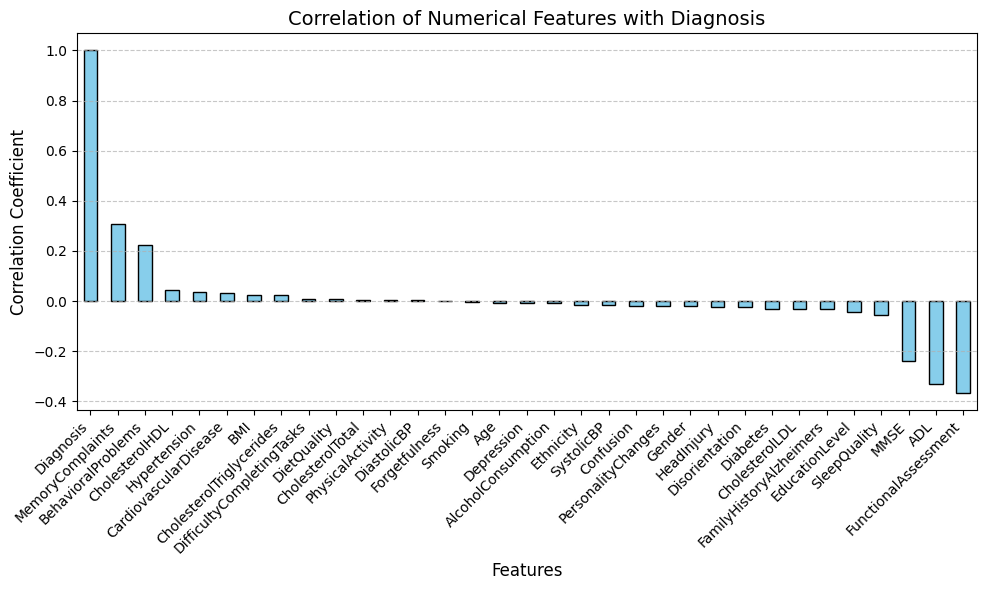

In [5]:
#Correlation (For Numerical Features)
#For numerical features and a categorical label (like diagnosis),
#calculate the correlation or use statistical tests like ANOVA.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_alz is your DataFrame and 'diagnosis' is your label
numerical_features = df_alz.select_dtypes(include=["float64", "int64"]).columns
correlation = df_alz[numerical_features].corrwith(df_alz["Diagnosis"])

# Sort correlations
correlation_sorted = correlation.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlation_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation of Numerical Features with Diagnosis', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





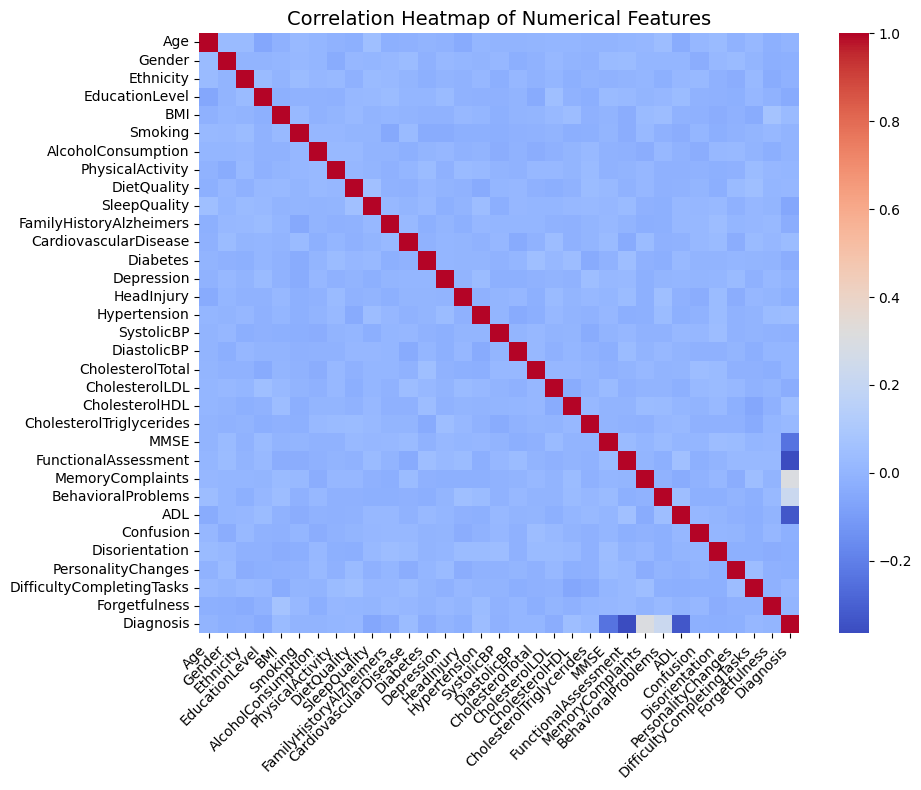

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataframe
correlation_matrix = df_alz.corr()  # This calculates the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



#Close to zero = no correlation.
#Positive(close to positive 1) and negative(close to negative 1) value is most significance

#Threshold (For Continuous Data)
#Correlation >0.8 or <-0.8 Features are highly dependent
#Correlation close to 0: Likely independent


In [9]:
#Chi-Square Test (For Categorical Features)
#Use the Chi-Square test to identify the relationship between
#categorical attributes and the label.

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Separate features (X) and label (y)
X = df_alz.drop("Diagnosis", axis=1)
y = df_alz["Diagnosis"]

# Convert categorical data to numeric (if any)
X = pd.get_dummies(X)

# Apply Chi-Square test
chi_scores = chi2(X, y)
p_values = pd.Series(chi_scores[1], index=X.columns)

# Sort and print p-values (lower is more significant)
print(p_values.sort_values())

#Chi-Square statistic (chi_scores[0]): A higher value indicates a stronger association.
#P-value (chi_scores[1]): A lower value indicates that the feature is more likely to be significant.

#Null Hypothesis: The features are independent.


MMSE                         4.420255e-134
FunctionalAssessment         1.830430e-104
ADL                           4.266893e-92
MemoryComplaints              1.053099e-36
BehavioralProblems            1.296254e-21
CholesterolTriglycerides      1.315002e-12
CholesterolHDL                3.175724e-09
CholesterolLDL                8.232584e-09
SleepQuality                  8.175256e-02
BMI                           9.381680e-02
EducationLevel                1.041854e-01
SystolicBP                    1.050753e-01
Hypertension                  1.335468e-01
CardiovascularDisease         1.768832e-01
Diabetes                      1.783008e-01
FamilyHistoryAlzheimers       1.872141e-01
Disorientation                2.944802e-01
HeadInjury                    3.444022e-01
PersonalityChanges            3.782066e-01
CholesterolTotal              4.008212e-01
Ethnicity                     4.138538e-01
Confusion                     4.278322e-01
Gender                        4.944747e-01
AlcoholCons

Highly Significant Features

1.   MMSE
2.   FunctionalAssessment
3.   ADL
4.   MemoryComplaints
5.   BehavioralProblems
6.   CholesterolTriglycerides
7.   CholesterolHDL
8.   CholesterolLDL

Marginally Significant Features
1.   SleepQuality
2.   BMI



In [11]:
#Extract the selected features from dataset
selected_features = [
    'MMSE', 'FunctionalAssessment', 'ADL',
    'MemoryComplaints', 'BehavioralProblems',
    'CholesterolTriglycerides', 'CholesterolHDL', 'CholesterolLDL'
]

X_selected = X[selected_features]  # X is the features part of your data


In [13]:
#Create new label from MMSE scores
#MMSE > 24: Mild.
#MMSE 10–23: Moderate.
#MMSE < 10: Severe.

df_alz['Stage'] = pd.cut(
    df_alz['MMSE'],
    bins=[-1, 10, 24, 30],
    labels=['Severe', 'Moderate', 'Mild']
)

In [15]:
#Split the Data into training and testing sets

from sklearn.model_selection import train_test_split


X = df_alz.drop(columns=['Stage'])
y = df_alz['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


**2. Choose and train the model (Train Multi-Class Model)**

In [17]:
#Logistic Regression
#Good model for binary or multiclass classification, especially with continuous features.

from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#Random Forest
#A versatile model that works well with both numerical and categorical data.

from sklearn.ensemble import RandomForestClassifier

RFmodel = RandomForestClassifier(random_state=42)
RFmodel.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
#Support Vector Machine(SVM)
#SVM can perform well with smaller feature sets.

from sklearn.svm import SVC

SVMmodel = SVC()
SVMmodel.fit(X_train, y_train)

SVC()

In [23]:
#Naive Bayes
#Use Naive Bayes for classification:
from sklearn.naive_bayes import GaussianNB

NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)


GaussianNB()

In [36]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 4.2/124.9 MB 22.9 MB/s eta 0:00:06
   --- ------------------------------------ 10.7/124.9 MB 26.8 MB/s eta 0:00:05
   ----- ---------------------------------- 17.8/124.9 MB 28.8 MB/s eta 0:00:04
   -------- ------------------------------- 25.7/124.9 MB 31.9 MB/s eta 0:00:04
   --------- ------------------------------ 28.8/124.9 MB 27.7 MB/s eta 0:00:04
   ---------- ----------------------------- 31.5/124.9 MB 25.3 MB/s eta 0:00:04
   ---------- ----------------------------- 33.6/124.9 MB 23.2 MB/s eta 0:00:04
   ----------- ---------------------------- 35.9/124.9 MB 21.3 MB/s eta 0:00:05
   ------------ --------------------------- 38.3/124.9 MB 20.3 MB/s eta 0:00:05
   ------------ --------------------------- 40.4/124.9 MB 19.3 MB/s eta 0:00:05
   ------------- -------------------------- 42.7/124

In [25]:
# Import the XGBoost classifier

from xgboost import XGBClassifier
#based on the concept of boosting, where models (weak learners, typically decision trees)
#are trained sequentially to correct the errors of the previous models.

# Initialize the XGBoost classifier
XGBoost_model = XGBClassifier(
    objective='binary:logistic',  # Specify binary classification
    eval_metric='mlogloss',       # Default evaluation metric for binary classification
    use_label_encoder=False,     # Prevent label encoding warnings
    n_estimators=100,            # Number of trees
    learning_rate=0.1,           # Learning rate
    max_depth=6                  # Depth of trees
)

# Train the XGBoost model
XGBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = XGBoost_model.predict(X_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Mild' 'Moderate' 'Severe']

In [27]:
from xgboost import XGBClassifier
XGBoost_model = XGBClassifier(
    objective='multi:softmax',  # Specify multiclass classification
    eval_metric='mlogloss',     # Suitable metric for multiclass classification
    use_label_encoder=False,    # Prevent label encoding warnings
    num_class=3,                # Number of classes (Mild, Moderate, Severe)
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


**3. Evaluate the Model**

In [29]:
models = {
    "Logistic Regression": LRmodel,
    "Random Forest": RFmodel,
    "SVM": SVMmodel,
    "Naive Bayes": NBmodel,
    "XGBoost": XGBoost_model
}


In [31]:
#Accuracy
from sklearn.metrics import accuracy_score

# Loop through each model and print its accuracy
for model_name, model in models.items():
    if model_name == "XGBoost":
        model.fit(X_train, y_train_encoded)  # Use encoded labels
        y_pred_encoded = model.predict(X_test)
        y_pred = label_encoder.inverse_transform(y_pred_encoded)  # Decode predictions
    else:
        model.fit(X_train, y_train)  # Use original string labels
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"Accuracy of {model_name}: {accuracy:.4f}")

#Accuracy is a proportion of correct predictions made by the model out of all predictions.
#Correct prediction / Total number of prediction

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.9372
Accuracy of Random Forest: 0.9977
Accuracy of SVM: 0.7186
Accuracy of Naive Bayes: 0.9651
Accuracy of XGBoost: 0.9977


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [33]:
#Metrics( Precision, Recall, F1-Score)
from sklearn.metrics import classification_report

for model_name, model in models.items():
    if model_name == "XGBoost":
        # Use encoded labels for prediction and decode them for the report
        y_pred_encoded = model.predict(X_test)
        y_pred = label_encoder.inverse_transform(y_pred_encoded)
    else:
        # Directly predict using original string labels
        y_pred = model.predict(X_test)

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))


#Precision: The proportion of positive predictions that are actually correct.
#Recall: The proportion of actual positives that were correctly identified by the model.
#F1-Score: The harmonic mean of precision and recall, which gives a single score to evaluate the model.
#Support: The number of actual occurrences of the class in the test set.

#Example Interpretation For First Model
#Precision: Class 0 (Negative): 0.86 = 86% were predicted as negative correctly, for all intances predicted.
#Precision: Class 1 (Positive): 0.80 = 80% were predicted as positive correctly, for all intances predicted.
#Means the model has a better precision for Class 0 than Class 1, meaning it more accurate when predicting the negative class.

#Recall: Class 0 (Negative): 0.90 = 90% were correctly identified by the model, for all of actual negative intances.
#Recall: Class 1 (Positive): 0.73 = 73% were correctly identified by the model, for all of actual positive intances.
#Means the model better identifying Class 0 than Class 1, it misses more positive cases.

#F1-Score: Class 0 (Negative): 0.88 = 88% (A balanced measure of precision and recall for Class 0 (negative).
#F1-Score: Class 1 (Positive): 0.76 = 76% (A balanced measure of precision and recall for Class 1 (positive).
#Means the F1-score for Class 0 is higher than for Class 1, which shows the model is performing better overall for the negative class.

#Support: Class 0 (Negative): 277 There are 277 instances of Class 0 in the dataset.
#Support: Class 1 (Positive): 153 There are 153 instances of Class 1 in the dataset.
#Means there are more Class 0 (negative) instances in the dataset than Class 1 (positive) instances.

#Accuracy: 0.84 = This means the model correctly predicted the class (negative or positive) for 84% of the instances in the test set.
#Macro Average: MA Precision: 0.83
#Macro Average: MA Recall: 0.81
#Macro Average: MA F1-Score: 0.82
#Means the macro average gives equal weight to each class, irrespective of the class size. In this case, the model performs reasonably well for both classes.

#Weighted Average Precision: 0.84
#Weighted Average Recall: 0.84
#Weighted Average F1-Score: 0.84
#Means The weighted average takes the class distribution into account. Since Class 0 has more instances (277 vs. 153),
#its performance has a higher influence on the overall metrics. The weighted average is slightly better than the macro average, reflecting the better performance on Class 0.

#The model is likely to miss some positive instances (false negatives), but it doesn't make a lot of false positives.
#It does better at identifying negative cases (Class 0) with higher precision and recall.
#The model is likely to miss some positive instances (false negatives), but it doesn't make a lot of false positives.
#The model is performing well overall, with 84% accuracy.



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        Mild       0.91      0.87      0.89        83
    Moderate       0.93      0.94      0.93       203
      Severe       0.97      0.97      0.97       144

    accuracy                           0.94       430
   macro avg       0.93      0.93      0.93       430
weighted avg       0.94      0.94      0.94       430

Classification Report for Random Forest:
              precision    recall  f1-score   support

        Mild       1.00      0.99      0.99        83
    Moderate       1.00      1.00      1.00       203
      Severe       1.00      1.00      1.00       144

    accuracy                           1.00       430
   macro avg       1.00      1.00      1.00       430
weighted avg       1.00      1.00      1.00       430

Classification Report for SVM:
              precision    recall  f1-score   support

        Mild       0.00      0.00      0.00        83
    Modera

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

**4. Hypeparameter Tuning (Optional)**
To improve model performance

In [ ]:
#GridSearchCV Example for Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


**5. Feature Importance**
Analyze feature importance to understand which of the selected features contribute most to the model's predictions, especially with tree-based models like Random Forest.

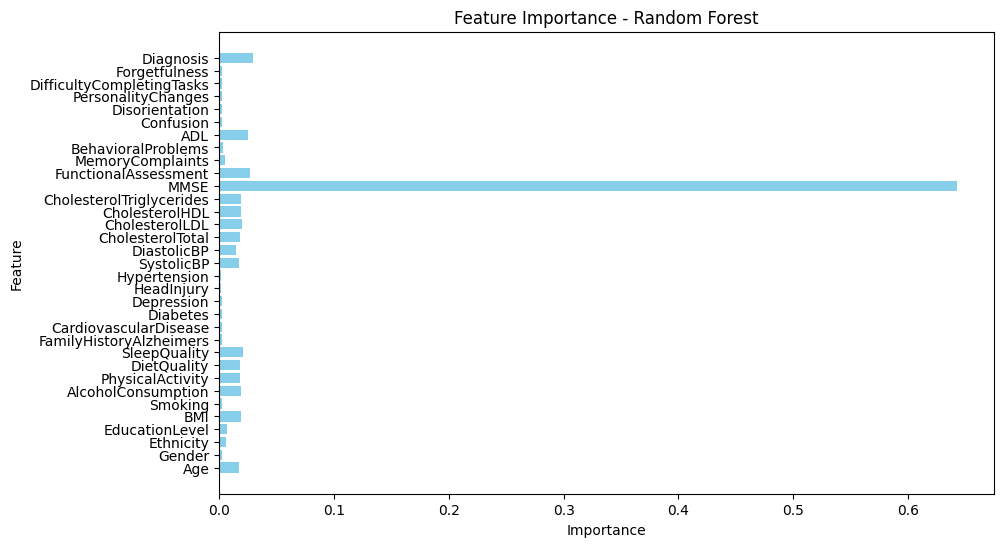

In [32]:
import matplotlib.pyplot as plt

# Assuming `RFmodel` is the trained Random Forest model
importances = RFmodel.feature_importances_  # Get feature importances
features = X_train.columns  # Get feature names from the training data

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.show()


**6. Model Validation(Cross-Validation)**

>  cross-validation use to assess its performance more robustly.



In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RFmodel, X_selected, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean score:", cv_scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean score: 1.0


**7. Save and Deploy the Model**

In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'alzheimers_model.pkl')

# To load the model later:
# model = joblib.load('alzheimers_model.pkl')


['alzheimers_model.pkl']

**Visualize Results**

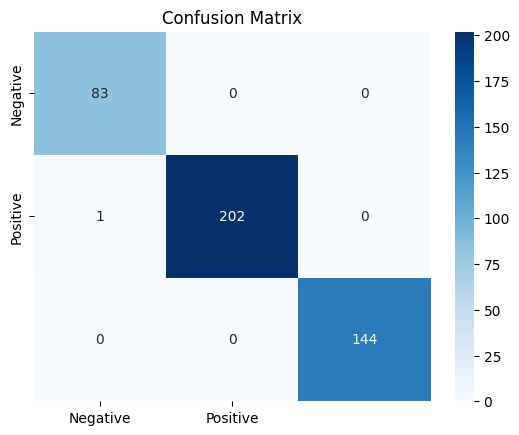

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.show()
